### Using FVBAE on Fashion-MNIST

The Fashion-MNIST dataset is a well formatted compilation of pictures containing single articles of clothing on a white background and color-inverted. The figures are in greyscale, cropped appropriately, and are all formatted as 28x28 pixel intensity matrices.

In [3]:
from keras.datasets import fashion_mnist
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

In [4]:
Xtrain = Xtrain.reshape(60000, 784)
Xtrain = Xtrain / 255

In [5]:
import fvbae
import keras
import matplotlib.pyplot as plt
import numpy as np

In [6]:
optimizer = keras.optimizers.RMSprop()

autoencoder, encoder, decoder = fvbae.vae(Xtrain, nndim = 500, latentdim = int(2), samplestd = 1.0,
        epochs = int(20), batch_size = int(200))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 314.7481
Epoch 2/20
60000/60000 [==============================] - 4s 73us/step - loss: 282.6182
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 275.0807
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 270.9662
Epoch 5/20
60000/60000 [==============================] - 4s 74us/step - loss: 268.4541
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 266.6456
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 265.3178
Epoch 8/20
60000/60000 [==============================] - 5s 75us/step - loss: 264.3258
Epoch 9/20
60000/60000 [==============================] - 5s 75us/step - loss: 263.5721
Epoch 10/20
60000/60000 [==============================] - 5s 75us/step - loss: 262.7565

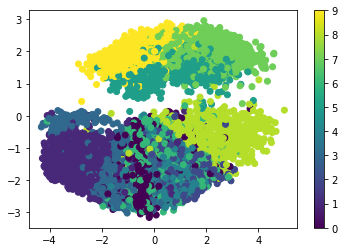

In [7]:
Xtest = Xtest.reshape((len(Xtest), np.prod(Xtest.shape[1:])))
x_test_encoded = encoder.predict(Xtest/255, batch_size = int(100))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=ytest)
plt.colorbar()
plt.show()

We see that the autoencoder is capable of separating many of the classes in the latent space, which is very low-dimension in compatison with the original 756 dimensional input vector.

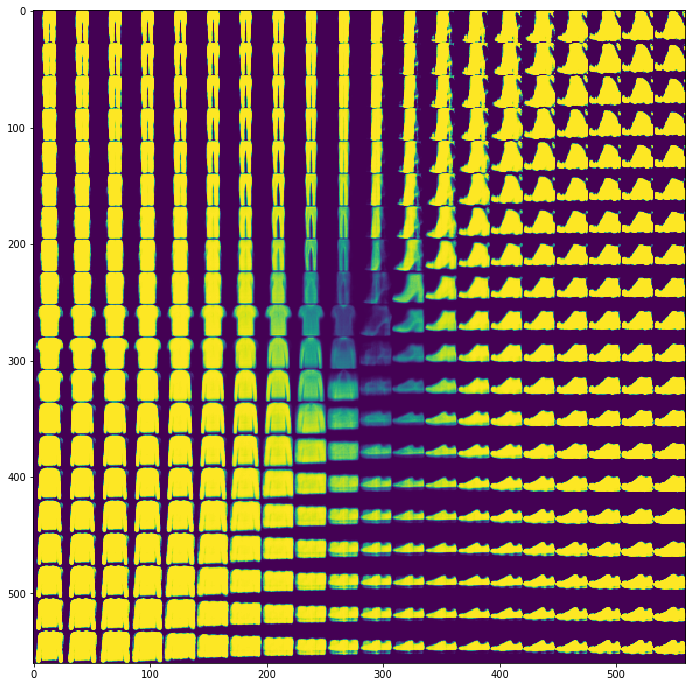

In [13]:
### This code for plotting has been borrowed from https://blog.keras.io/building-autoencoders-in-keras.html

n = 20  
pix_size = 28
grid = np.zeros((pix_size*n,  pix_size*n))
grid_x = np.linspace(-10, 10, n)
grid_y = np.linspace(-10, 10, n)

for i, x in enumerate(grid_x):
    for j, y in enumerate(grid_y):
        latent = np.array([[x, y]])
        decoded = decoder.predict(latent)
        digit = decoded[0]
        digit = digit.reshape(pix_size, pix_size)
        grid[i * pix_size: (i + 1) * pix_size,
               j * pix_size: (j + 1) * pix_size] = digit

plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.show()

The autoencoder has learned the rough silhouettes of different types of shirts, jackets, shoes, and pants, which is exactly the information we find in the data.